In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from category_encoders import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [109]:
# Importing the insurance dataset
insurance = pd.read_csv('C:\\Users\\EagleCORS\OneDrive\\Desktop\\David_assignment 7-8\\ADS-Assignment-7-8\\insurance.csv')

In [110]:
# Explore the data using pandas exploratory tools
print(insurance.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [111]:
print(insurance.describe())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [112]:
print(insurance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


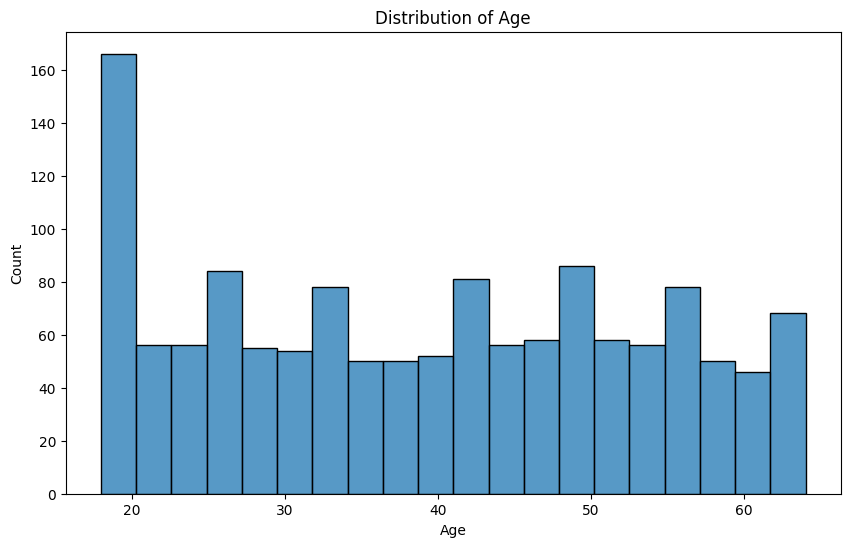

In [113]:
# Age distribution visualization
plt.figure(figsize=(10, 6))
sns.histplot(insurance['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

In [114]:
# Continuous and discrete features
numerical_continuous = ['age', 'bmi', 'charges']
numerical_discrete = ['children']
categorical = ['sex', 'smoker', 'region']

In [115]:
# Check for outliers in numerical_continuous columns
for col in numerical_continuous:
    z_scores = zscore(insurance[numerical_continuous])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    insurance = insurance[filtered_entries]

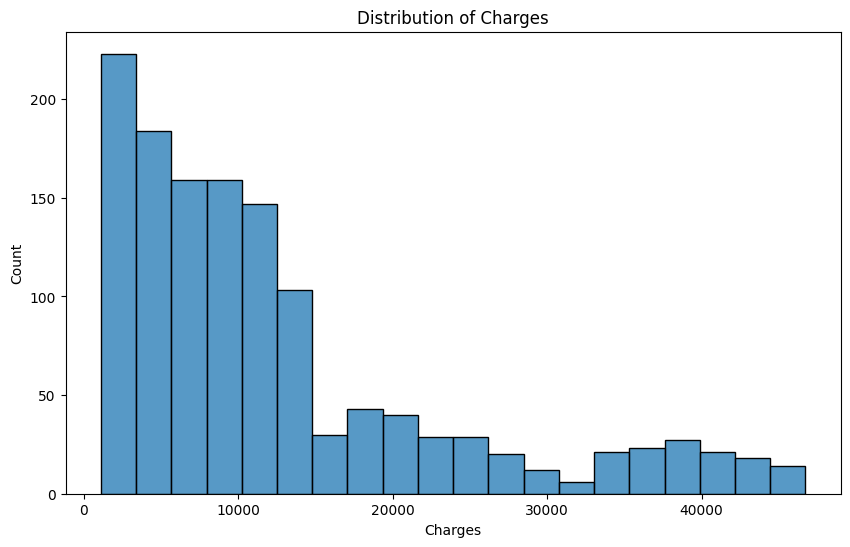

In [116]:
# Value distribution visualization
plt.figure(figsize=(10, 6))
sns.histplot(insurance['charges'], bins=20)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.show()


In [117]:
# Outlier detection and removal for discrete and categorical features
for col in numerical_discrete + categorical:
    threshold = 0.05
    counts = insurance[col].value_counts(normalize=True)
    mask = insurance[col].isin(counts[counts < threshold].index)
    insurance[col][mask] = 'Other'

In [118]:
insurance[numerical_discrete] = insurance[numerical_discrete].astype(str)

In [119]:
# Encoding categorical and discrete features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(insurance[categorical + numerical_discrete])
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names(categorical + numerical_discrete), index=insurance.index)
X = pd.concat([X_encoded, insurance[numerical_continuous]], axis=1)
y = insurance['charges']

C:\Users\EagleCORS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [120]:
# Feature selection
selector = SelectKBest(f_regression, k=5)
selector.fit(X, y)
X_new = selector.transform(X)
selected_features = X.columns[selector.get_support(indices=True)]
X = X[selected_features]

In [140]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [146]:
# Replace NaN values with median
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())


In [147]:
# Replace infinite values with a large number
X_train[~np.isfinite(X_train)] = 1e16
X_test[~np.isfinite(X_test)] = 1e16

In [148]:
# Convert labels back to their original scale
y_test = np.exp(y_test)
y_test_pred = np.exp(y_test_pred)

C:\Users\EagleCORS\AppData\Local\Temp\ipykernel_15304\2613626074.py:3: RuntimeWarning: overflow encountered in exp
  y_test_pred = np.exp(y_test_pred)


In [149]:
# Calculate and print evaluation metrics
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R-squared:', r2_score(y_test, y_test_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Convert target labels to log values
y = np.log(y)


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train and evaluate linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_train_score = linear_reg.score(X_train_scaled, y_train)
linear_reg_test_score = linear_reg.score(X_test_scaled, y_test)

In [ ]:
# Train and evaluate support vector regression
svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_train_score = svr.score(X_train_scaled, y_train)
svr_test_score = svr.score(X_test_scaled, y_test)

In [ ]:
# Train and evaluate decision tree regression
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train_scaled, y_train)
decision_tree_reg_train_score = decision_tree_reg.score(X_train_scaled, y_train)
decision_tree_reg_test_score = decision_tree_reg.score(X_test_scaled, y_test)

In [ ]:
# Train and evaluate random forest regression
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train_scaled, y_train)
random_forest_reg_train_score = random_forest_reg.score(X_train_scaled, y_train)
random_forest_reg_test_score = random_forest_reg.score(X_test_scaled, y_test)

In [ ]:
# Train the best model (random forest regression) with training data
random_forest_reg.fit(X_train_scaled, y_train)

# Evaluate model performance using mean absolute error, mean squared error, and R-squared score
y_train_pred = np.exp(random_forest_reg.predict(X_train_scaled))
y_test_pred = np.exp(random_forest_reg.predict(X_test_scaled))
train_mae = mean_absolute_error(np.exp(y_train), y_train_pred)
test_mae = mean_absolute_error(np.exp(y_test), y_test_pred)
train_mse = mean_squared_error(np.exp(y_train), y_train_pred)
test_mse = mean_squared_error(np.exp(y_test), y_test_pred)
train_r2 = r2_score(np.exp(y_train), y_train_pred)
test_r2 = r2_score(np.exp(y_test), y_test_pred)

print('Training MAE:', train_mae)
print('Testing MAE:', test_mae)
print('Training MSE:', train_mse)
print('Testing MSE:', test_mse)
print('Training R-squared:', train_r2)
print('Testing R-squared:', test_r2)
